In [1]:
import pandas as pd
import os

In [2]:
outputs = 'bakta_outputs'

### LBUEL H11 basic exploration
First check how many proteins prokka and bakta have identified.

In [3]:
h11_prokka = pd.read_csv('h11_prokka.tab', sep = '\t')
h11_prokka['product'].value_counts()

product
hypothetical protein                1627
putative protein                       9
tRNA-Met(cat)                          7
Tyrosine recombinase XerC              7
Major exported protein                 6
                                    ... 
IS5 family transposase IS903           1
IS6 family transposase IS26            1
IS1380 family transposase ISEcp1       1
IS66 family transposase ISPsy43        1
3'-5' exonuclease DinG                 1
Name: count, Length: 2288, dtype: int64

In [4]:
h11 = pd.read_csv(os.path.join(outputs, 'GCA_003171695.1/GCA_003171695.1.tsv'), sep = '\t', header = 5)

In [5]:
print(h11['Type'].value_counts(), h11['Product'].value_counts(), sep='\n\n')

Type
cds              4214
tRNA               83
ncRNA              45
ncRNA-region       32
crispr-spacer      14
crispr-repeat      14
rRNA               13
sorf               10
oriV                3
oriT                3
crispr              2
tmRNA               1
Name: count, dtype: int64

Product
hypothetical protein                                   186
Phage protein                                          185
Lipoprotein                                             50
Fimbrial protein                                        41
Transcriptional regulator                               26
                                                      ... 
NADH-quinone oxidoreductase subunit A                    1
Topoisomerase II                                         1
Dual specificity protein phosphatase family protein      1
IS1380 family transposase                                1
IS6 family IS15DIV transposase                           1
Name: count, Length: 3230, dtype: int64


Visualizing COG functions

In [6]:
cog_functions = pd.read_csv("COG/cog-24.fun.tab", names=["CategoryID","Number","Color","Description"], sep = "\t")
cog_definitions = pd.read_csv("COG/cog-24.def.tab",names = ["COG","CategoryID","Name","Gene","Pathway","PubMedID","PDBID"],sep = "\t",  encoding='cp1252')

In [7]:
cog_definitions["CategoryID"] = cog_definitions.CategoryID.apply(lambda x: list(x)[0])


In [8]:
COG = cog_definitions[["COG","CategoryID"]].merge(cog_functions, on = "CategoryID")

In [9]:
import re

def extract_cogs(dbxrefs):
    return re.findall(r'COG:COG\d+', str(dbxrefs))

h11['COG'] = h11['DbXrefs'].apply(extract_cogs)
h11_cog = h11[h11['COG'].apply(lambda x: len(x) > 0)].copy() 
h11_cog['COG'] = h11_cog['COG'].apply(lambda x: x[0] if x else None)
h11_cog['COG'] = h11_cog['COG'].str.replace('COG:', '', regex=False)

<Axes: ylabel='Description'>

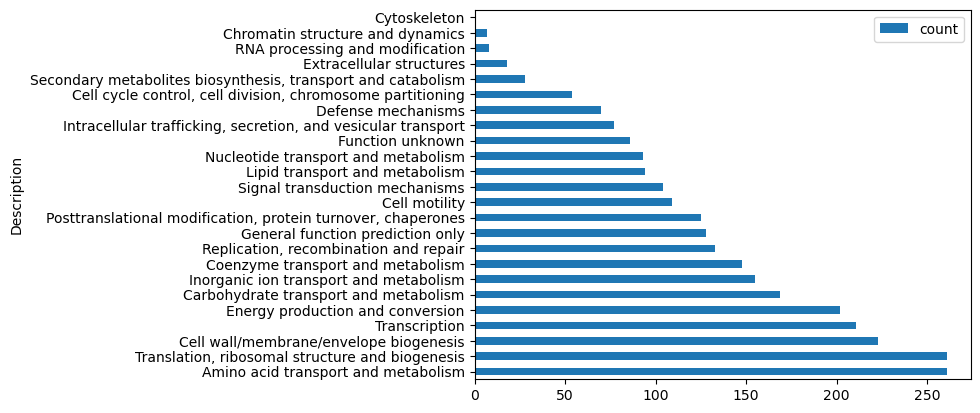

In [10]:
h11_cog.merge(COG, on = "COG").Description.value_counts().to_frame().plot(kind='barh')

Overview of resistance proteins

In [11]:
h11[h11['Product'].str.contains('resis', case=False)]

,#Sequence Id,Type,Start,Stop,Strand,Locus Tag,Gene,Product,DbXrefs,COG
103,contig_3,cds,88455,89270,+,HACEFP_00104,sul2,sulfonamide-resistant dihydropteroate synthase...,"COG:COG0294, COG:H, EC:2.5.1.15, GO:0004156, G...",[COG:COG0294]
110,contig_3,cds,96662,97204,-,HACEFP_00111,NaN,Tunicamycin resistance protein,"RefSeq:WP_000587837.1, SO:0001217, UniParc:UPI...",[]
182,contig_5,cds,1507,2004,+,HACEFP_00180,dfrA12,trimethoprim-resistant dihydrofolate reductase...,"EC:1.5.1.3, GO:0004146, KEGG:K00287, NCBIProte...",[]
185,contig_5,cds,3708,4679,+,HACEFP_00183,sul1,sulfonamide-resistant dihydropteroate synthase...,"COG:COG0294, COG:H, EC:2.5.1.15, GO:0004156, G...",[COG:COG0294]
187,contig_5,cds,6317,6943,-,HACEFP_00185,tetR(G),tetracycline resistance transcriptional repres...,"BlastRules:WP_000163574, COG:COG1309, COG:K, G...",[COG:COG1309]
938,contig_37,cds,62164,62667,-,HACEFP_00929,trxA,Metal resistance protein,"COG:COG0526, COG:O, RefSeq:WP_036919933.1, SO:...",[COG:COG0526]
939,contig_37,cds,62667,63398,-,HACEFP_00930,dsbG,Copper resistance protein,"COG:COG1651, COG:O, RefSeq:WP_004247442.1, SO:...",[COG:COG1651]
940,contig_37,cds,63398,65434,-,HACEFP_00931,NaN,Metal resistance protein,"COG:COG4233, COG:OC, KEGG:K08344, RefSeq:WP_10...",[COG:COG4233]
941,contig_37,cds,65515,65904,-,HACEFP_00932,NaN,Metal resistance protein,"RefSeq:WP_004246039.1, SO:0001217, UniParc:UPI...",[]
1387,contig_92,cds,41787,43640,+,HACEFP_01374,yccC,Multidrug resistance protein,"COG:COG1289, COG:S, KEGG:K15547, SO:0001217, U...",[COG:COG1289]
